## Import Package

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score

# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Membaca Dataset

In [2]:
df = pd.read_csv('android_traffic.csv', sep=';')
df_copy = df.copy()

## Menghapus kolom yang memiliki NaN 100%

In [3]:
columns_to_remove = ['duracion','avg_local_pkt_rate','avg_remote_pkt_rate']
df_copy = df_copy.drop(columns = columns_to_remove)

## Memisahkan fitur independent dan fitur dependent

In [4]:
X = df_copy.iloc[:, :-1].values # Independent Feature
y = df_copy.iloc[:, 13].values # Dependent Feature

## Melakukan Labeling

In [5]:
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(X).toarray()

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)


## Membagi dataset menjadi Training dan Testing

In [6]:
X_Train, X_Test, y_Train, y_Test = train_test_split(\
                                                    X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 100)


## Model Random Forest

In [7]:
model_rf = RandomForestClassifier(random_state=100)

model_rf.fit(X_Train, y_Train)
y_pred = model_rf.predict(X_Test)

print(confusion_matrix(y_Test, y_pred))
print("Accuracy: ", accuracy_score(y_Test, y_pred))
print("Balanced Accuracy: ", balanced_accuracy_score(y_Test, y_pred))

[[935   4]
 [ 26 604]]
Accuracy:  0.9808795411089866
Balanced Accuracy:  0.9772351539124702


## Visualization

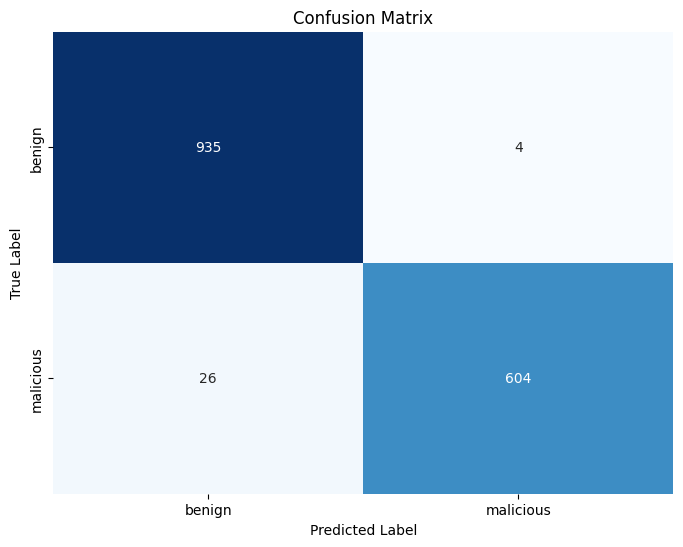

In [8]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Membuat Confusion Matrix
conf_matrix = confusion_matrix(y_Test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,\
            xticklabels=label_encoder_y.classes_, yticklabels=label_encoder_y.classes_)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
X_Train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

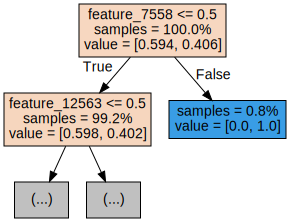

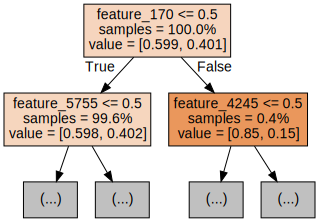

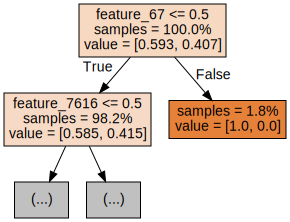

In [14]:
num_features = X_Train.shape[1]
feature_names = [f"feature_{i}" for i in range(num_features)]

for i in range(3):
    tree = model_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,
                               filled=True,
                               max_depth=1,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)